### Assignment 1 on Intensity Transformations and Neighborhood Filtering

#### Question 01

In [46]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

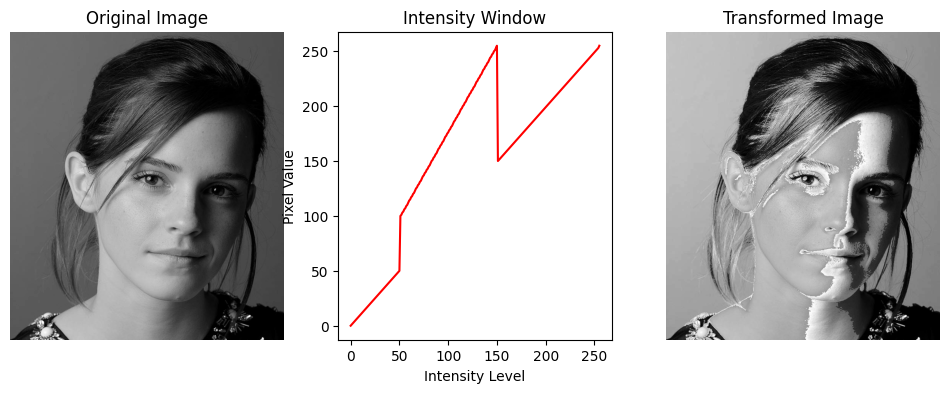

In [47]:
emma = cv.imread(r'D:\Study Material\MyGitHub\Intensity-Transformations-and-Neighborhood-Filtering\Intensity-Transformations-and-Neighborhood-Filtering\Vision_photos\emma.jpg', cv.IMREAD_GRAYSCALE)

assert emma is not None

t1 = np.linspace(0,50,51, dtype=np.uint8)
t2 = np.linspace(100,255,150-50, dtype=np.uint8)
t3  = np.linspace(150,255, 255-150, dtype=np.uint8)

intensity_window = np.concatenate((t1,t2,t3), axis=0)
transformed_emma = cv.LUT(emma, intensity_window)

fig,ax = plt.subplots(1,3,figsize=(12,4))

ax[0].imshow(emma, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].plot(intensity_window, 'r')
ax[1].set_title('Intensity Window')
ax[1].set_xlabel('Intensity Level')
ax[1].set_ylabel('Pixel Value')

ax[2].imshow(transformed_emma, cmap='gray')
ax[2].set_title('Transformed Image')
ax[2].axis('off')

plt.show()


#### Question 02

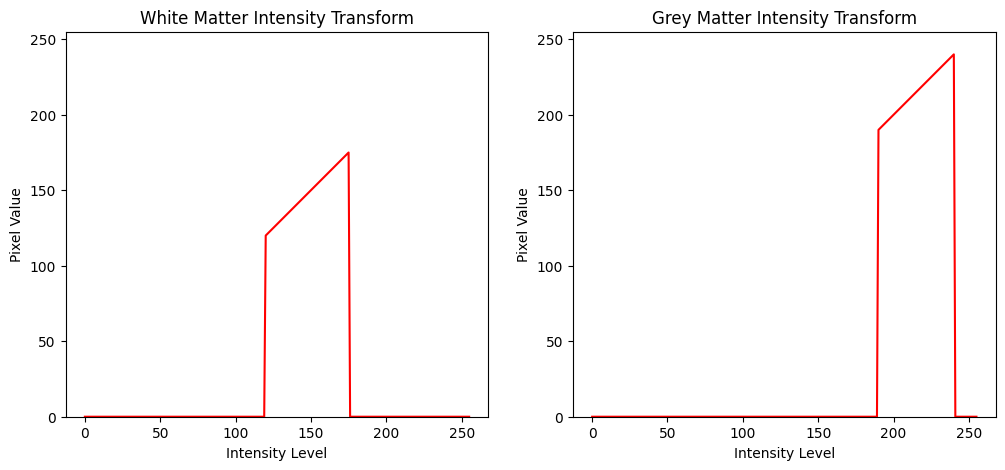

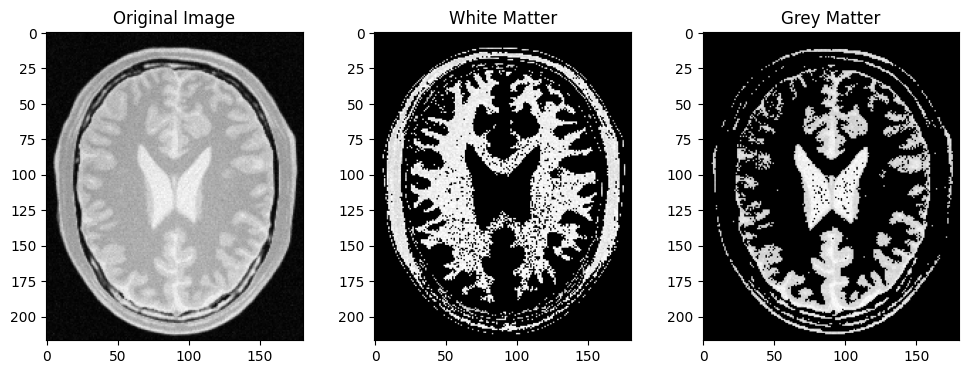

In [48]:
brain_im_path = r"D:\Study Material\MyGitHub\Intensity-Transformations-and-Neighborhood-Filtering\Intensity-Transformations-and-Neighborhood-Filtering\Vision_photos\brain_proton_density_slice.png"
brain_image = cv.imread(brain_im_path, cv.IMREAD_GRAYSCALE)

white_threshold = np.array([120,175], dtype=np.uint8)
grey_threshold = np.array([190,240], dtype=np.uint8)

white_matter_transform = np.zeros(256, dtype=np.uint8)
grey_matter_transform = np.zeros(256, dtype=np.uint8)

#linear transformation 
white_matter_transform[white_threshold[0]:white_threshold[1]+1] = np.linspace(white_threshold[0], white_threshold[1],white_threshold[1]-white_threshold[0]+1,dtype=np.uint8) 
grey_matter_transform[grey_threshold[0]:grey_threshold[1]+1] = np.linspace(grey_threshold[0], grey_threshold[1],grey_threshold[1]-grey_threshold[0]+1,dtype=np.uint8) 

#Applying the transformation
white_matter = cv.LUT(brain_image, white_matter_transform)
grey_matter = cv.LUT(brain_image, grey_matter_transform)

#plot intensity transform functions
fig,ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(white_matter_transform, 'r')
ax[0].set_title('White Matter Intensity Transform')
ax[0].set_xlabel('Intensity Level')
ax[0].set_ylabel('Pixel Value')
ax[0].set_ylim([0,255])

ax[1].plot(grey_matter_transform, 'r')
ax[1].set_title('Grey Matter Intensity Transform')
ax[1].set_xlabel('Intensity Level')
ax[1].set_ylabel('Pixel Value')
ax[1].set_ylim([0,255])

#plot images

fig,ax = plt.subplots(1,3,figsize=(12,4))

ax[0].imshow(brain_image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(white_matter, cmap='gray')
ax[1].set_title('White Matter')

ax[2].imshow(grey_matter, cmap='gray')
ax[2].set_title('Grey Matter')

plt.show()

### Question 03

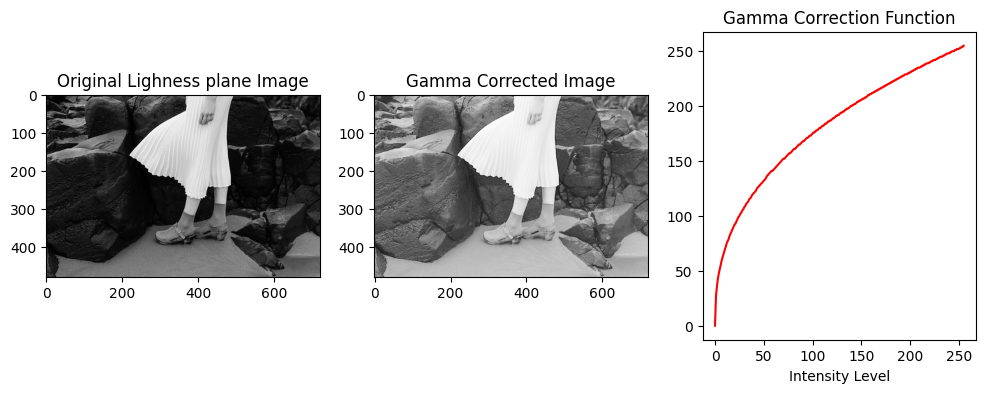

In [49]:
im3 = cv.imread(r"D:\Study Material\MyGitHub\Intensity-Transformations-and-Neighborhood-Filtering\Intensity-Transformations-and-Neighborhood-Filtering\Vision_photos\highlights_and_shadows.jpg")

assert im3 is not None

#Apply gamma correction to the L plane in the L∗a∗b∗ color space and state the γ value.

lab_image = cv.cvtColor(im3, cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab_image) #sepertaing to indiviudual components

#Gamma Correlation function
gamma = 0.4 #To brighten the image(1>gamma)
gamma_function = np.array([((i/255.0)**gamma)*255 for i in np.arange(256)], dtype=np.uint8)

L_gamma_corrected = cv.LUT(L, gamma_function)

fig,ax = plt.subplots(1,3,figsize=(12,4))

ax[0].imshow(L, cmap='gray')
ax[0].set_title('Original Lighness plane Image')

ax[1].imshow(L_gamma_corrected, cmap='gray')
ax[1].set_title('Gamma Corrected Image')

ax[2].plot(gamma_function, 'r')
ax[2].set_title('Gamma Correction Function')
ax[2].set_xlabel('Intensity Level')



plt.show()

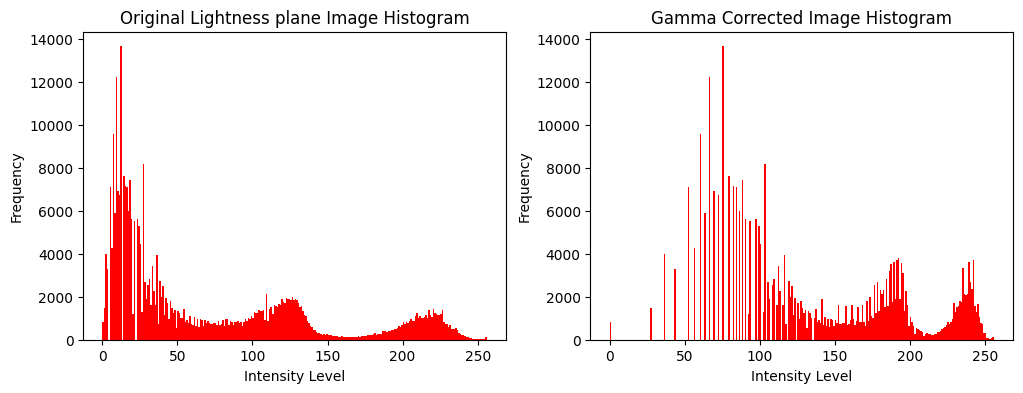

In [50]:
# show the histograms of the original and gamma corrected images

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].hist(L.flatten(), bins=256, range=(0,256), color='r') 
ax[0].set_title('Original Lightness plane Image Histogram')
ax[0].set_xlabel('Intensity Level')
ax[0].set_ylabel('Frequency')

ax[1].hist(L_gamma_corrected.flatten(), bins=256, range=(0,256), color='r')
ax[1].set_title('Gamma Corrected Image Histogram')
ax[1].set_xlabel('Intensity Level')
ax[1].set_ylabel('Frequency')

plt.show()

### Question 04


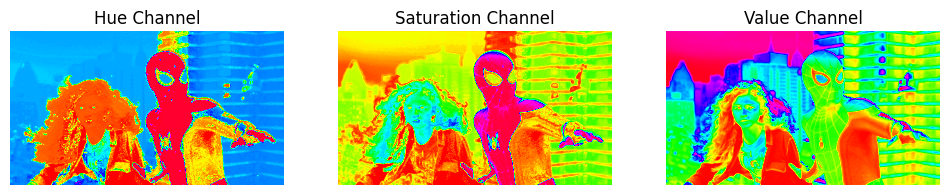

In [52]:
spider_path = r"D:\Study Material\MyGitHub\Intensity-Transformations-and-Neighborhood-Filtering\Intensity-Transformations-and-Neighborhood-Filtering\Vision_photos\spider.png"

spider_im = cv.cvtColor(cv.imread(spider_path), cv.COLOR_BGR2HSV)

#Splitting the image into hue, saturation, and value planes.
hue, saturation, value = cv.split(spider_im)

fig, axes = plt.subplots(1,3,figsize=(12,4))

axes[0].imshow(hue, cmap='hsv')
axes[0].set_title('Hue Channel')
axes[0].axis('off')

axes[1].imshow(saturation, cmap='hsv')
axes[1].set_title('Saturation Channel')
axes[1].axis('off')

axes[2].imshow(value, cmap='hsv')
axes[2].set_title('Value Channel')
axes[2].axis('off')

plt.show()

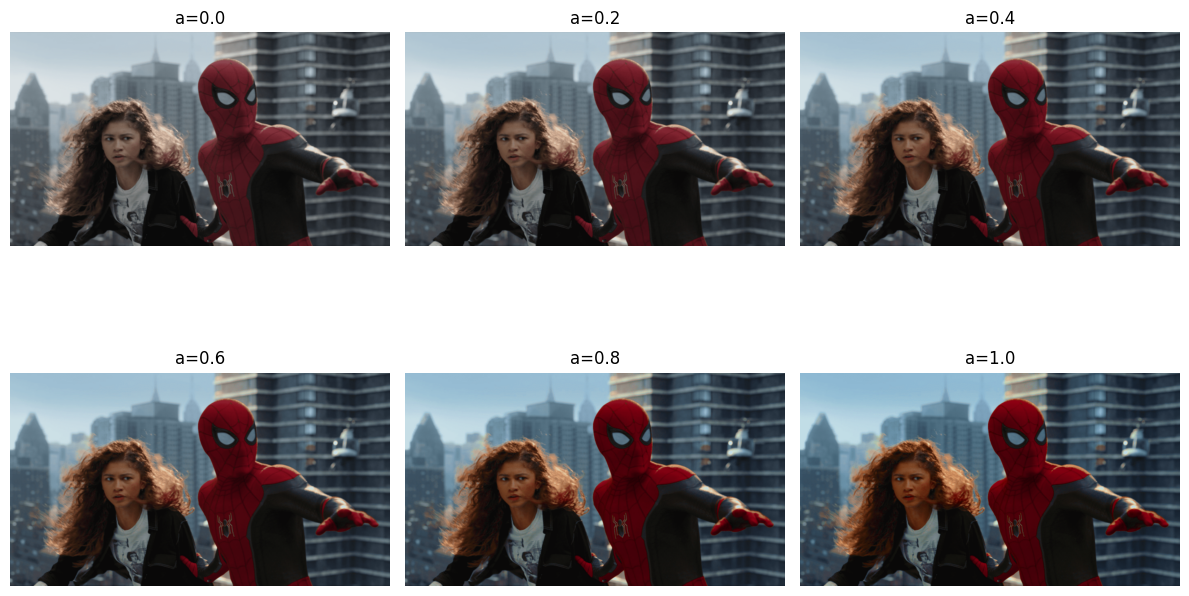

In [65]:
# Define the intensity transformation function
def f(x, a):
    sigma = 70
    return min(x + a*128*np.exp(-(x-128)**2/(2*sigma**2)), 255)

# Create a figure with 2 rows and 3 columns (6 images total)
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()  

# Change a values
for idx, a in enumerate(np.arange(0, 1.1, 0.2, dtype=np.float32)):  # Adjust to get 6 images
    vibrance_enhanced = np.array([f(i, a) for i in np.arange(256)], dtype=np.uint8)
    vibrance_enhanced_saturation = cv.LUT(saturation, vibrance_enhanced)

    hsv_image = cv.merge([hue, vibrance_enhanced_saturation, value]) #Merge the image back
    rgb_image = cv.cvtColor(hsv_image, cv.COLOR_HSV2RGB) #conversion to RGB
    
    # Plot on the corresponding subplot
    axs[idx].imshow(rgb_image)
    axs[idx].set_title(f'a={a:.1f}')
    axs[idx].axis('off')  # Turn off the axis labels for clarity

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


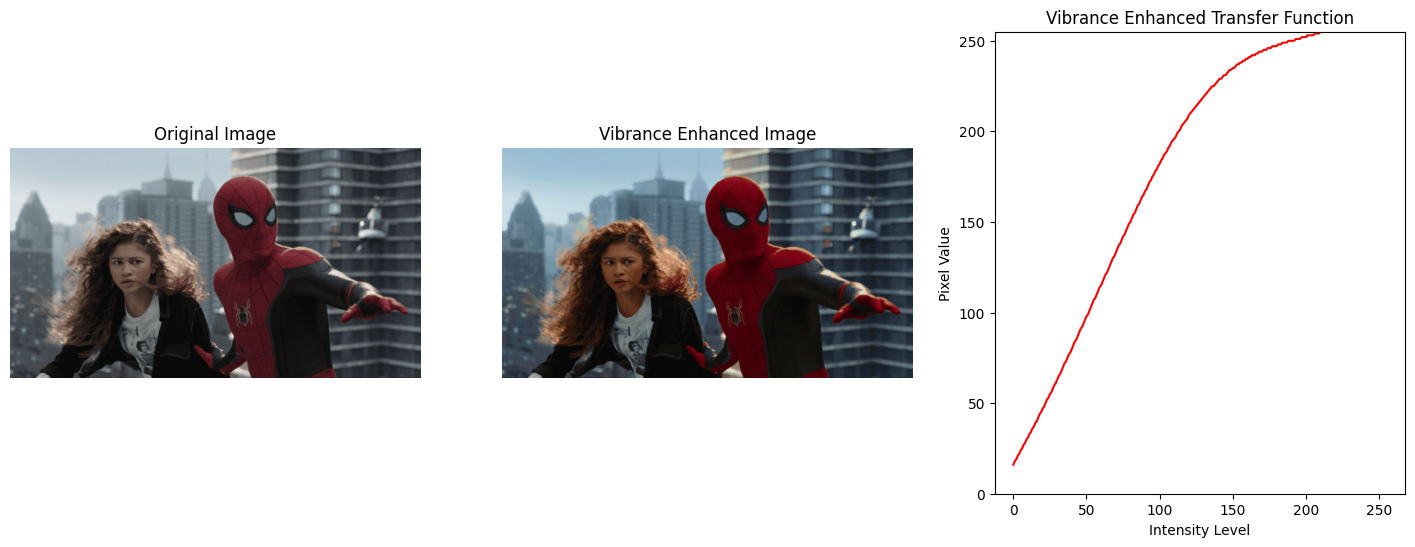

In [68]:
spider_path = r"D:\Study Material\MyGitHub\Intensity-Transformations-and-Neighborhood-Filtering\Intensity-Transformations-and-Neighborhood-Filtering\Vision_photos\spider.png"

spider_im = cv.cvtColor(cv.imread(spider_path), cv.COLOR_BGR2HSV)
hue, saturation, value = cv.split(spider_im)

def f(x, a):
    sigma = 70
    return min(x + a*128*np.exp(-(x-128)**2/(2*sigma**2)), 255)

#select a for vibrance
a = 0.7

vibrance_enhanced = np.array([f(i, a) for i in np.arange(256)], dtype=np.uint8)
vibrance_enhanced_saturation = cv.LUT(saturation, vibrance_enhanced)

hsv_image = cv.merge([hue, vibrance_enhanced_saturation, value])
rgb_image = cv.cvtColor(hsv_image, cv.COLOR_HSV2RGB)

fig,ax = plt.subplots(1,3,figsize=(18,6))

ax[0].imshow(cv.cvtColor(cv.imread(spider_path), cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(rgb_image)
ax[1].set_title('Vibrance Enhanced Image')
ax[1].axis('off')

ax[2].plot(vibrance_enhanced, 'r')
ax[2].set_title('Vibrance Enhanced Transfer Function')
ax[2].set_xlabel('Intensity Level')
ax[2].set_ylabel('Pixel Value')
ax[2].set_ylim([0,255])

plt.show()

### Question 05

In [101]:
shells_path = r"D:\Study Material\MyGitHub\Intensity-Transformations-and-Neighborhood-Filtering\Intensity-Transformations-and-Neighborhood-Filtering\Vision_photos\shells.tif"

shells_image = cv.imread(shells_path, cv.IMREAD_GRAYSCALE)
assert shells_image is not None

In [102]:
def hist_equalized(image_array, L):

    histogram, bins = np.histogram(image_array.flatten(), L, [0,L])
    cdf = histogram.cumsum()
    M, N = image_array.shape

    hist_equalized = (((L-1)/(M*N))*cdf).astype(np.uint8)
    equlized_image = cv.LUT(image_array, histogram_equalized)
    
    return equlized_image

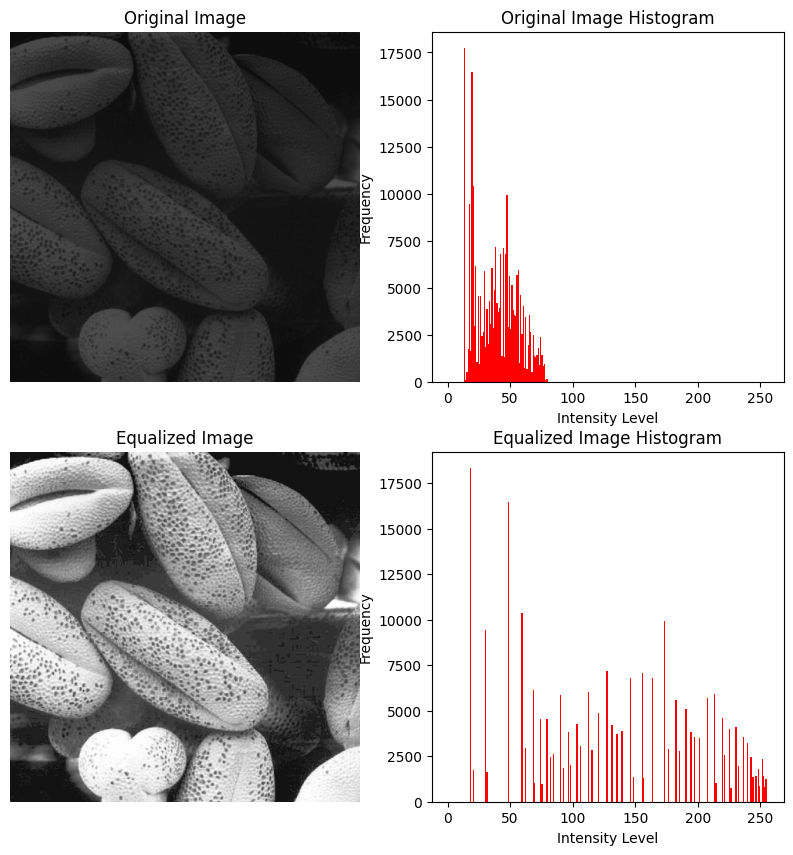

In [103]:

equalized_shells = hist_equalized(shells_image, 256)

fig,ax = plt.subplots(2,2,figsize=(10,10))

ax[0,0].imshow(shells_image, cmap='gray', vmin=0, vmax=255)
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

ax[0,1].hist(shells_image.flatten(), bins=256, range=(0,256), color='r')
ax[0,1].set_title('Original Image Histogram')
ax[0,1].set_xlabel('Intensity Level')
ax[0,1].set_ylabel('Frequency')

ax[1,0].imshow(equalized_shells, cmap='gray', vmin=0, vmax=255)
ax[1,0].set_title('Equalized Image')
ax[1,0].axis('off')

ax[1,1].hist(equalized_shells.flatten(), bins=256, range=(0,256), color='r')
ax[1,1].set_title('Equalized Image Histogram')
ax[1,1].set_xlabel('Intensity Level')
ax[1,1].set_ylabel('Frequency')

plt.show()

### Question 06

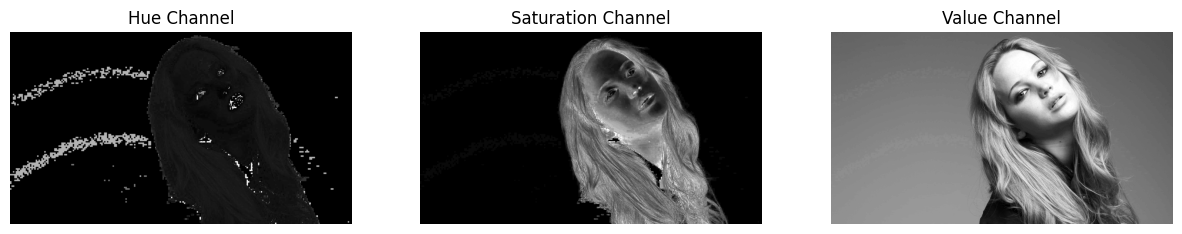

In [107]:
jennifer_path = r"D:\Study Material\MyGitHub\Intensity-Transformations-and-Neighborhood-Filtering\Intensity-Transformations-and-Neighborhood-Filtering\Vision_photos\jeniffer.jpg"

jennifer_im = cv.imread(jennifer_path)
assert jennifer_im is not None

hue, saturation, value = cv.split(cv.cvtColor(jennifer_im, cv.COLOR_BGR2HSV))

fig, axes = plt.subplots(1,3,figsize=(15,6))

axes[0].imshow(hue, cmap='gray')
axes[0].set_title('Hue Channel')
axes[0].axis('off')

axes[1].imshow(saturation, cmap='gray')
axes[1].set_title('Saturation Channel')
axes[1].axis('off')

axes[2].imshow(value, cmap='gray')
axes[2].set_title('Value Channel')
axes[2].axis('off')

plt.show()

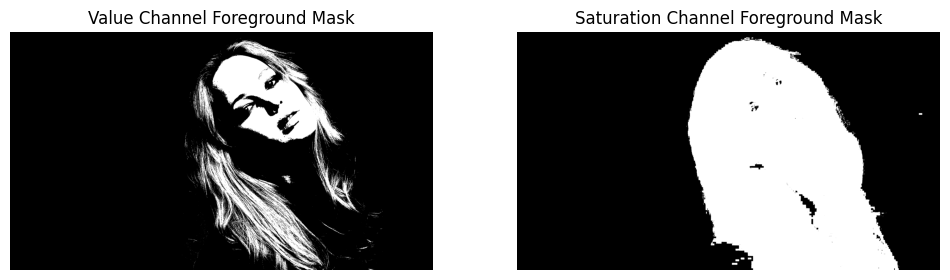

In [108]:
sat_threshold = 11

# Select the appropriate plane to threshold in extract the foreground mask. A mask is a binary image.

value_foreground_mask = cv.threshold(value, 160, 255, cv.THRESH_BINARY)[1]
sat_foreground_mask = cv.threshold(saturation, sat_threshold, 255, cv.THRESH_BINARY)[1]

fig, axes = plt.subplots(1,2,figsize=(12,6))

axes[0].imshow(value_foreground_mask, cmap='gray')
axes[0].set_title('Value Channel Foreground Mask')
axes[0].axis('off')

axes[1].imshow(sat_foreground_mask, cmap='gray')
axes[1].set_title('Saturation Channel Foreground Mask')
axes[1].axis('off')

plt.show()


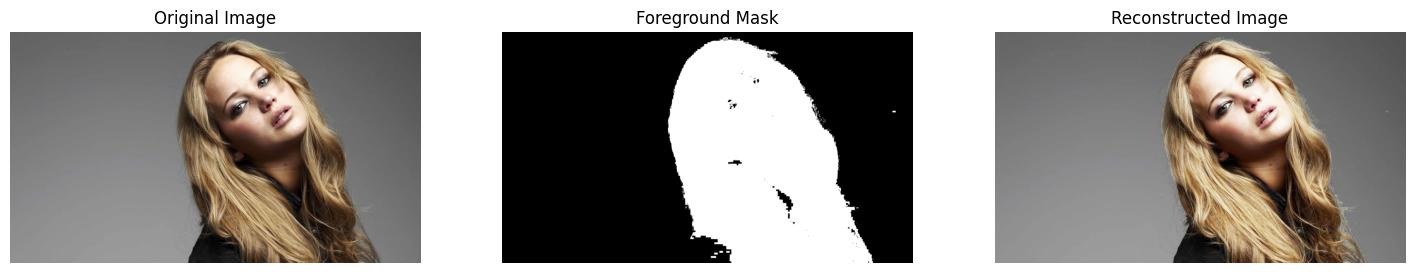

In [111]:
mask = sat_foreground_mask #saturation channel is selected

foreground = cv.bitwise_and(jennifer_im, jennifer_im, mask=sat_foreground_mask)

def hist_equalized(image_array, L):

    histogram, bins = np.histogram(image_array.flatten(), L, [0,L])
    cdf = histogram.cumsum()
    M, N,c = image_array.shape
    
    hist_equalized = (((L-1)/(M*N))*cdf).astype(np.uint8)

    equlized_image = cv.LUT(image_array, hist_equalized)

    return equlized_image


hist_equalized_foreground = hist_equalized(foreground, 256)

#extract background of original image
background = cv.bitwise_and(jennifer_im, jennifer_im, mask=~mask)

#reconstruted equlized image
reconstructed_image = cv.add(background, hist_equalized_foreground)

original_image_rgb = cv.cvtColor(jennifer_im, cv.COLOR_BGR2RGB)
reconstructed_image_rgb = cv.cvtColor(reconstructed_image, cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(1,3,figsize=(18,6))

ax[0].imshow(original_image_rgb)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Foreground Mask')
ax[1].axis('off')

ax[2].imshow(reconstructed_image_rgb)
ax[2].set_title('Reconstructed Image')
ax[2].axis('off')

plt.show()


### Question 07

In [116]:
einstein_path = r"D:\Study Material\MyGitHub\Intensity-Transformations-and-Neighborhood-Filtering\Intensity-Transformations-and-Neighborhood-Filtering\Vision_photos\einstein.png"

einstein_im = cv.imread(einstein_path, cv.IMREAD_GRAYSCALE)
assert einstein_im is not None

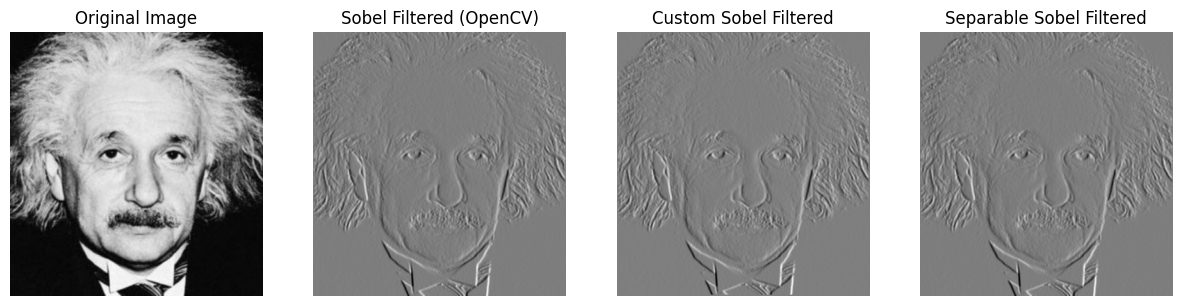

In [127]:
# Define the Sobel kernel for the x-direction
sobel_kernel_x = np.array([[1, 0, -1],
                            [2, 0, -2],
                            [1, 0, -1]])

# Apply the Sobel filter using filter2D function
sobel_filtered_opencv = cv.filter2D(einstein_im, cv.CV_64F, sobel_kernel_x)

# Custom Sobel filtering function
def apply_sobel_filter(input_image, kernel):
    rows, cols = input_image.shape
    k_size = kernel.shape[0]
    
    filtered_output = np.zeros((rows, cols), dtype=np.float64)

    for i in range(1, rows - k_size + 1):
        for j in range(1, cols - k_size + 1):
            # Convolve the kernel with the image
            filtered_output[i, j] = np.sum(input_image[i - 1:i + 2, j - 1:j + 2] * kernel)

    return filtered_output

# Apply the custom Sobel filter function
sobel_filtered_custom = apply_sobel_filter(einstein_im, sobel_kernel_x)

# Define separable Sobel kernels for x and y directions
sobel_kernel_x_separable = np.array([1, 0, -1]).reshape(1, 3)
sobel_kernel_y_separable = np.array([1, 2, 1]).reshape(3, 1)

# Apply the x-direction Sobel filter
sobel_filtered_x = cv.filter2D(einstein_im, cv.CV_64F, sobel_kernel_x_separable)

# Apply the y-direction Sobel filter 
sobel_filtered_separable = cv.filter2D(sobel_filtered_x, cv.CV_64F, sobel_kernel_y_separable)

# Visualize the original and filtered images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(einstein_im, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(sobel_filtered_opencv, cmap='gray')
axes[1].set_title('Sobel Filtered (OpenCV)')
axes[1].axis('off')

axes[2].imshow(sobel_filtered_custom, cmap='gray')
axes[2].set_title('Custom Sobel Filtered')
axes[2].axis('off')

axes[3].imshow(sobel_filtered_separable, cmap='gray')
axes[3].set_title('Separable Sobel Filtered')
axes[3].axis('off')


plt.show()

### Question 08

In [128]:
def zoom_image(image, zoom_factor, interpolation):
    M, N, c = image.shape
    new_M = int(M*zoom_factor)
    new_N = int(N*zoom_factor)

    if interpolation == 'nearest neighbour' or 'INTER_NEAREST':
        zoomed_image = cv.resize(image, (new_N, new_M), interpolation= cv.INTER_NEAREST)

    elif interpolation == 'bilinear' or 'INTER_LINEAR':
        zoomed_image = cv.resize(image, (new_N, new_M), interpolation=cv.INTER_LINEAR)

    else:
        try:
            zoomed_image = cv.resize(image, (new_N, new_M), interpolation=interpolation)
        except:
            raise ValueError('Invalid interpolation method')
            return None

    return zoomed_image

In [130]:
arwen = cv.imread(r"D:\Study Material\MyGitHub\Intensity-Transformations-and-Neighborhood-Filtering\Intensity-Transformations-and-Neighborhood-Filtering\Vision_photos\a1q5images\im02.png", cv.IMREAD_COLOR)
assert arwen is not None
arwen = cv.cvtColor(arwen, cv.COLOR_BGR2RGB)

arwen_small = cv.imread(r"D:\Study Material\MyGitHub\Intensity-Transformations-and-Neighborhood-Filtering\Intensity-Transformations-and-Neighborhood-Filtering\Vision_photos\a1q5images\im02small.png", cv.IMREAD_COLOR)
assert arwen_small is not None
arwen_small = cv.cvtColor(arwen_small, cv.COLOR_BGR2RGB)

lotr = cv.imread(r"D:\Study Material\MyGitHub\Intensity-Transformations-and-Neighborhood-Filtering\Intensity-Transformations-and-Neighborhood-Filtering\Vision_photos\a1q5images\im01.png", cv.IMREAD_COLOR)
assert lotr is not None
lotr = cv.cvtColor(lotr, cv.COLOR_BGR2RGB)

lotr_small = cv.imread(r"D:\Study Material\MyGitHub\Intensity-Transformations-and-Neighborhood-Filtering\Intensity-Transformations-and-Neighborhood-Filtering\Vision_photos\a1q5images\im01small.png", cv.IMREAD_COLOR)
assert lotr_small is not None
lotr_small = cv.cvtColor(lotr_small, cv.COLOR_BGR2RGB)

arwen_zoomed_nn = zoom_image(arwen_small, 4, 'INTER_NEAREST')
arwen_zoomed_bilinear = zoom_image(arwen_small, 4, 'INTER_LINEAR')

lotr_zoomed_nn = zoom_image(lotr_small, 4, 'INTER_NEAREST')
lotr_zoomed_bilinear = zoom_image(lotr_small, 4, 'INTER_LINEAR')

# calculate the normalized SSD between the original and zoomed images
def ssd(original_image, zoomed_image):
    return np.sum(np.square(original_image - zoomed_image)) / original_image.size

arwen_ssd_nn = ssd(arwen, arwen_zoomed_nn)
arwen_ssd_bilinear = ssd(arwen, arwen_zoomed_bilinear)

lotr_ssd_nn = ssd(lotr, lotr_zoomed_nn)
lotr_ssd_bilinear = ssd(lotr, lotr_zoomed_bilinear)

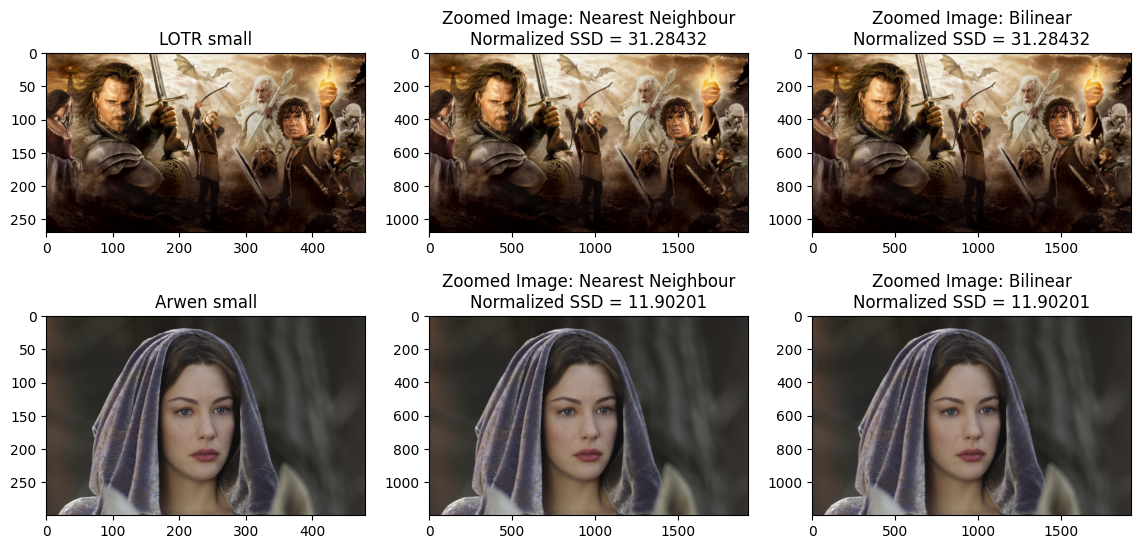

In [133]:
fig,ax = plt.subplots(2,3,figsize=(14,6.5))

ax[0,0].imshow(lotr_small)
ax[0,0].set_title('LOTR small')

ax[0,1].imshow(lotr_zoomed_nn)
ax[0,1].set_title('Zoomed Image: Nearest Neighbour\nNormalized SSD = {:.5f}'.format(lotr_ssd_nn))

ax[0,2].imshow(lotr_zoomed_bilinear)
ax[0,2].set_title('Zoomed Image: Bilinear\nNormalized SSD = {:.5f}'.format(lotr_ssd_bilinear))


ax[1,0].imshow(arwen_small)
ax[1,0].set_title('Arwen small')

ax[1,1].imshow(arwen_zoomed_nn)
ax[1,1].set_title('Zoomed Image: Nearest Neighbour\nNormalized SSD = {:.5f}'.format(arwen_ssd_nn))

ax[1,2].imshow(arwen_zoomed_bilinear)
ax[1,2].set_title('Zoomed Image: Bilinear\nNormalized SSD = {:.5f}'.format(arwen_ssd_bilinear))

plt.show()

### Question 09

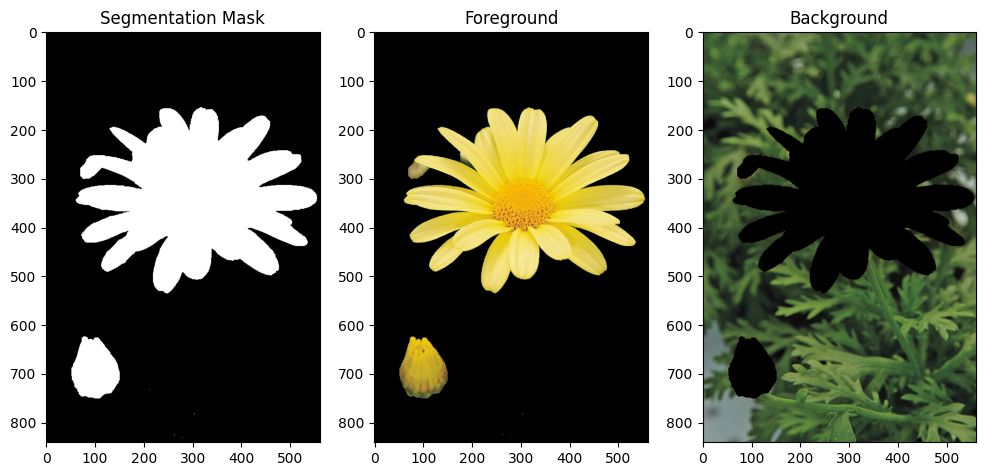

In [135]:
daisy = cv.imread(r"D:\Study Material\MyGitHub\Intensity-Transformations-and-Neighborhood-Filtering\Intensity-Transformations-and-Neighborhood-Filtering\Vision_photos\daisy.jpg", cv.IMREAD_COLOR)
assert daisy is not None
daisy = cv.cvtColor(daisy, cv.COLOR_BGR2RGB)

M,N,c = daisy.shape

mask = np.zeros(daisy.shape[:2], np.uint8) #Define an initial mask
rect = (50, 50, daisy.shape[1] - 50, daisy.shape[0] - 50) 

# Create the necessary arrays for grabCut
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Apply grabCut algorithm
cv.grabCut(daisy, mask, rect, bgd_model, fgd_model, 5, cv.GC_INIT_WITH_RECT)

# Final mask where probable foreground and definite foreground are marked
final_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Extract the foreground and background images
foreground = daisy * final_mask[:, :, np.newaxis]  # Foreground
background = daisy * (1 - final_mask[:, :, np.newaxis])  # Background

# Display results
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1), plt.imshow(final_mask, cmap='gray'), plt.title('Segmentation Mask')
plt.subplot(1, 3, 2), plt.imshow(foreground), plt.title('Foreground')
plt.subplot(1, 3, 3), plt.imshow(background), plt.title('Background')
plt.show()

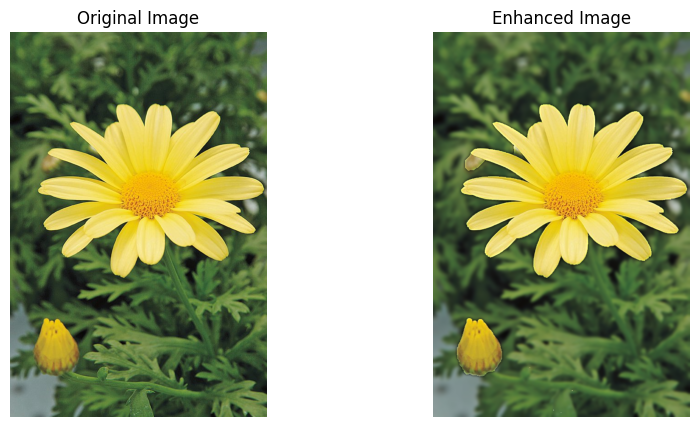

In [137]:
# apply median filter for smoothing

background_smoothed = cv.GaussianBlur(background, (15,15), 0)

# Combine the foreground and smoothed background
enhanced_image = cv.add(foreground, background_smoothed)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(daisy)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(enhanced_image)
axes[1].set_title('Enhanced Image')
axes[1].axis('off')

plt.show()